## Tumor Response to Treatment

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data #correlation lecture
drug_data=pd.read_csv(mouse_drug_data)
clinical_data=pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset #PandasMultiLine lecture
#Display Data for preview
combined_table = pd.merge(drug_data, clinical_data, on = "Mouse ID")
combined_table.head(5)




,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
#winning_wrestlers
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
t_data = combined_table.groupby(["Drug", "Timepoint"]).mean()
del t_data['Metastatic Sites']
t_data.reset_index(level= None, inplace= True)
# Convert to DataFrame
t_df= pd.DataFrame(t_data)

# Preview DataFrame
t_df.head(100)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
ert_data = combined_table.groupby(["Drug", "Timepoint"]).sem()
del ert_data['Metastatic Sites']
del ert_data['Mouse ID']
ert_data.reset_index(level= None, inplace= True)
# Convert to DataFrame
ert_df= pd.DataFrame(ert_data)

# Preview DataFrame
ert_df.head(100)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reform_table= t_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
reform_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [17]:
# Generate the Plot (with Error Bars) aesthetics lectures

# Save the Figure
#x_values= reform_table(Tumor Volume(mm3))
#y_values=reform_table[Timepoint]
#Capomulin Infubinol Ketapril Placebo


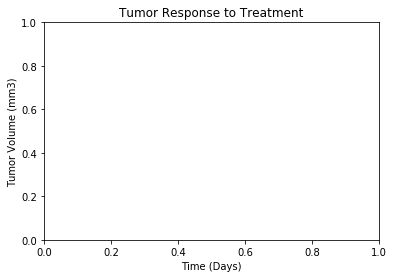

In [22]:
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [5]:
#winning_wrestlers
#Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mt_data = combined_table.groupby(["Drug", "Timepoint"]).mean()
del mt_data['Tumor Volume (mm3)']

# Convert to DataFrame
mt_df= pd.DataFrame(mt_data)

# Preview DataFrame
mt_df.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [6]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
ermt_data = combined_table.groupby(["Drug", "Timepoint"]).sem()
del ermt_data['Tumor Volume (mm3)']
del ermt_data['Mouse ID']
# Convert to DataFrame
ermt_df= pd.DataFrame(ermt_data)

# Preview DataFrame
ermt_df.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [18]:
# Minor Data Munging to Re-Format the Data Frames
reform2_table= t_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
reform2_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Text(0, 0.5, 'Treatment Duration(Days)')

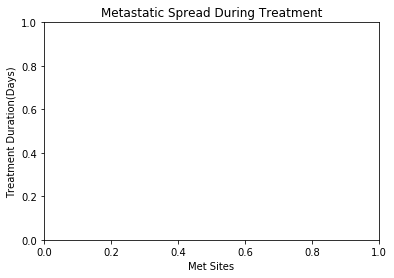

In [20]:
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Met Sites")
plt.ylabel("Treatment Duration(Days)")
plt.show()

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_data = combined_table.groupby(["Drug", "Timepoint"]).count()
del mice_data['Tumor Volume (mm3)']
del mice_data['Metastatic Sites']
mice_data.reset_index(level= None, inplace= True)
# Convert to DataFrame
mice_df= pd.DataFrame(mice_data)

# Preview DataFrame
mice_df.head(5)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames
reform3_table= mice_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
# Preview that Reformatting worked
reform3_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Text(0, 0.5, 'Time (Days)')

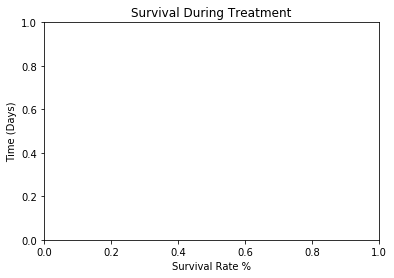

In [21]:
plt.title("Survival During Treatment")
plt.xlabel("Survival Rate %")
plt.ylabel("Time (Days)")

plt.show()

## Summary Bar Graph

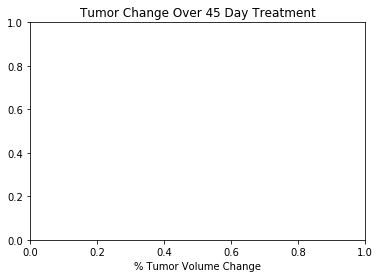

In [23]:
# Save the Figure
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("% Tumor Volume Change")
plt.show()

